In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
import glob
import os

In [16]:
BaseDir = '/data/inspur_disk03/userdir/wangcx/BASS_stack/area1/area1_hdf5_2'

In [17]:
fps = glob.glob(BaseDir+'/*.hdf5')
fps = [i.replace(BaseDir+'/','') for i in fps]

In [18]:
pre_dir = '/data/dell5/userdir/maotx/Lens/result/area1_hdf5_2_lens_049_40'
pre_fps = glob.glob(pre_dir+'/*.txt')

In [19]:
def read_res(fp):
    with open(fp, 'r') as fp:
        data = fp.readlines()
    ss = [i.replace('\n','').split('\t') for i in data]
    ss = {ss[i][0]: float(ss[i][2])/(float(ss[i][1])+float(ss[i][2])) for i in range(len(ss))}
    return ss

In [20]:
prob = {}
for fp in pre_fps:
    a = read_res(fp)
    prob.update(a)

In [21]:
P = np.array(prob.values())

In [22]:
np.sum(P>0.99)

148

(array([ 4463., 10287., 14052., 16623., 17718., 17683., 16713., 15179.,
        13779., 12471., 11165., 10112.,  9001.,  8332.,  7727.,  7196.,
         6596.,  6165.,  5653.,  5283.,  4737.,  4513.,  4137.,  3709.,
         3504.,  3223.,  2964.,  2676.,  2509.,  2371.,  2197.,  2097.,
         1907.,  1866.,  1682.,  1566.,  1539.,  1413.,  1343.,  1291.,
         1188.,  1174.,  1074.,   999.,   992.,   917.,   869.,   883.,
          785.,   792.,   762.,   682.,   671.,   657.,   561.,   620.,
          560.,   529.,   521.,   518.,   445.,   472.,   439.,   455.,
          425.,   413.,   391.,   352.,   352.,   370.,   337.,   310.,
          326.,   297.,   292.,   312.,   249.,   255.,   252.,   272.,
          242.,   233.,   235.,   227.,   200.,   200.,   206.,   209.,
          209.,   156.,   172.,   151.,   160.,   149.,   152.,   141.,
          126.,   144.,   132.,   148.]),
 array([1.73832088e-04, 1.01720938e-02, 2.01703554e-02, 3.01686171e-02,
        4.01668788e-02

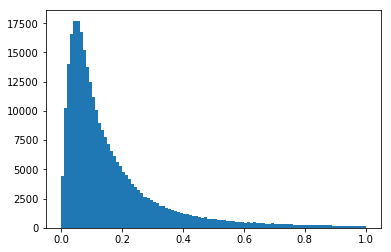

In [25]:
plt.hist(P,100)
#plt.yscale('log')